# CS 454 Final Paper: Kernel PCA with The Kernel Trick vs Nyström Approximation

## Author: Chloe Wohlgemuth (cbw975@gmail.com)

### MNIST Data Set

Downloaded from Kaggle : https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# data = np.genfromtxt("train_MNIST.csv", dtype=float, delimiter=',', names=True) 
import pandas as pd

digits = [2,6]
df = pd.read_csv('train_MNIST.csv')
df = df[df.label.isin(digits)]  # keep only digits of class 3 or 5
print(df.head(5)) # print first five rows of d0.

# store data as np array
d = df.to_numpy()
labels, data = d[:,0], d[:,1:]  # store labels and pixel data

print("data.shape:",data.shape)
print("labels.shape:",labels.shape)

    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
5       2    0    0    0    0    0    0    0    0    0  ...      0      0   
13      6    0    0    0    0    0    0    0    0    0  ...      0      0   
16      2    0    0    0    0    0    0    0    0    0  ...      0      0   
18      6    0    0    0    0    0    0    0    0    0  ...      0      0   
25      2    0    0    0    0    0    0    0    0    0  ...      0      0   

    28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
5       0      0      0      0      0      0      0      0  
13      0      0      0      0      0      0      0      0  
16      0      0      0      0      0      0      0      0  
18      0      0      0      0      0      0      0      0  
25      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
data.shape: (11876, 784)
labels.shape: (11876,)


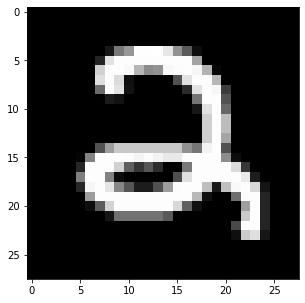

2


In [2]:
## Plot example digit
plt.figure(figsize=(5,5))
idx = 200

grid_data = np.asmatrix(data[idx]).reshape(28,28)  # reshape to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(labels[idx])

## 2D Visualization - PCA

In [3]:
from sklearn.decomposition import PCA

pca = PCA(2)
data_pca = pca.fit_transform(data)

print("data_pca.shape:",data_pca.shape)  # reduced shape / dimensionality

data_pca.shape: (11876, 2)


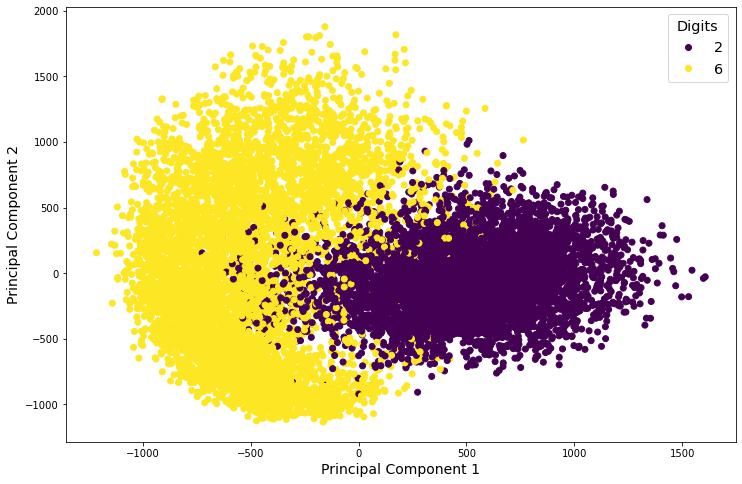

In [4]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(x=data_pca.T[0],y=data_pca.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

# plt.savefig("plot_2D_PCA_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')


## PCA Dimensionality Reduction

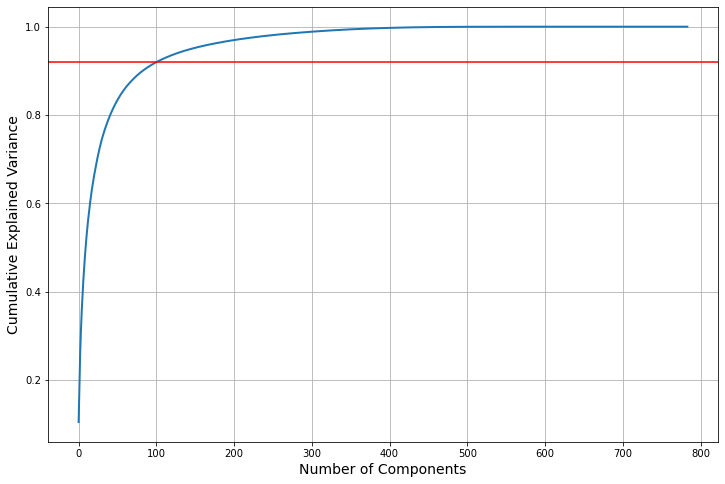

In [5]:
pca = PCA(784)
pca_data = pca.fit_transform(data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(12,8))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axhline(y=0.92, color='r', linestyle='-')
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components',size=14)
plt.ylabel('Cumulative Explained Variance',size=14)

# plt.savefig("plot_PCA_variance_explained.pdf",format='pdf',dpi=300,bbox_inches='tight')

# If we take 100-dimensions, approximately 92% of variance is expalined.

## KPCA with The Kernel Trick

In [6]:
from sklearn.decomposition import KernelPCA

data_kpca.shape: (11876, 2)


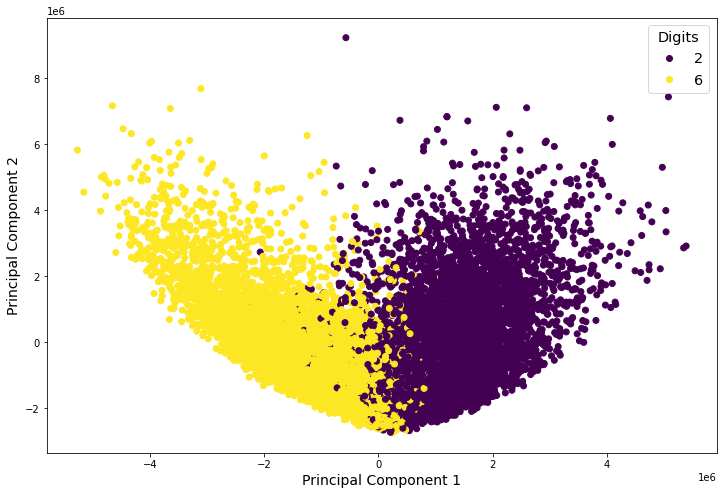

In [7]:
## Polynomial Kernel

kpca = KernelPCA(n_components=2, kernel='poly', gamma=1.0, coef0=1.0, degree=2)

data_kpca = kpca.fit_transform(data)
print("data_kpca.shape:",data_kpca.shape)  # reduced shape / dimensionality

plt.figure(figsize=(12,8))
scatter = plt.scatter(x=data_kpca.T[0],y=data_kpca.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

# plt.savefig("plot_2D_KPCA_poly_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')


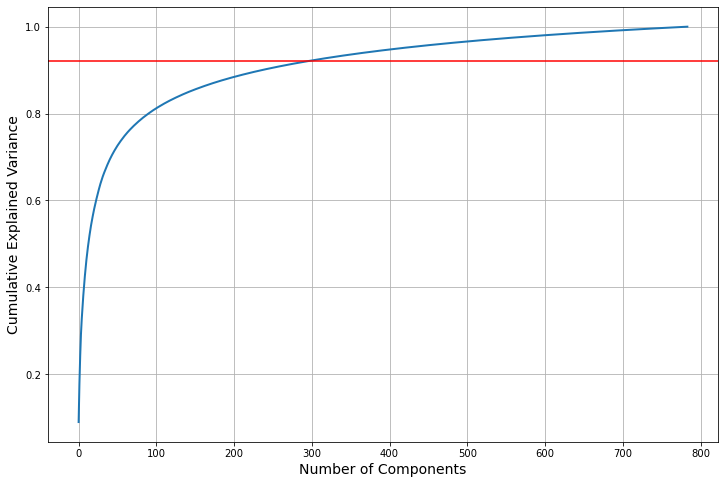

In [8]:
kpca = KernelPCA(n_components=784, kernel='poly', gamma=1.0, coef0=1.0, degree=2)
# kpca = KernelPCA(n_components=n_comps, kernel='rbf', gamma=1.0, coef0=0)
data_kpca = kpca.fit_transform(data)

explained_variance = np.var(data_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Plot the KPCA spectrum
plt.figure(1, figsize=(12,8))

plt.clf()
plt.plot(explained_variance_cumulative, linewidth=2)
plt.axhline(y=0.92, color='r', linestyle='-')
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components',size=14)
plt.ylabel('Cumulative Explained Variance',size=14)

plt.savefig("plot_KPCA_poly_variance_explained.pdf",format='pdf',dpi=300,bbox_inches='tight')

# If we take 300-dimensions, approx. 92% of variance is expalined.

data_kpca.shape: (11876, 2)


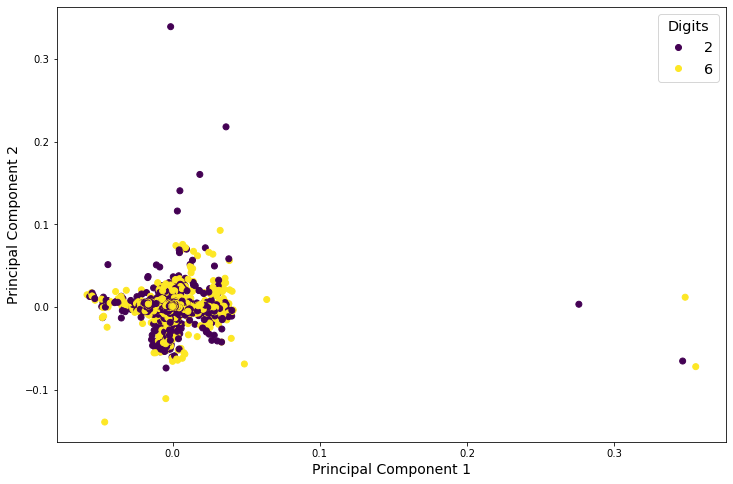

In [9]:
## RBF Kernel

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1.0, coef0=0)

data_kpca = kpca.fit_transform(data)
print("data_kpca.shape:",data_kpca.shape)  # reduced shape / dimensionality

plt.figure(figsize=(12,8))
scatter = plt.scatter(x=data_kpca.T[0],y=data_kpca.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

plt.savefig("plot_2D_KPCA_RBF_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')


In [10]:
# kpca = KernelPCA(n_components=10, kernel='rbf', gamma=1.0, coef0=0)
# data_kpca = kpca.fit_transform(data)

# explained_variance = np.var(data_kpca, axis=0)
# explained_variance_ratio = explained_variance / np.sum(explained_variance)
# explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# # Plot the KPCA spectrum
# plt.figure(1, figsize=(12,8))

# plt.clf()
# plt.plot(explained_variance_cumulative, linewidth=2)
# plt.axhline(y=0.92, color='r', linestyle='-')
# plt.axis('tight')
# plt.grid()
# plt.xlabel('Number of Components',size=14)
# plt.ylabel('Cumulative Explained Variance',size=14)

# plt.savefig("plot_KPCA_RBF_variance_explained.pdf",format='pdf',dpi=300,bbox_inches='tight')

# # If we take 100-dimensions, approx. 92% of variance is expalined.

## KPCA with Nyström Approximation

Data is saved to (and loaded from) txt files. The variances are stored in a txt file, with each line corresponding to a selected/kept principal component. Likewise, errors are stored line by line for each selected/kept principal component.

In [11]:
from nystrompca import NystromKPCA

In [13]:
## Smaller test run on subset of data (N = 25 points)

data0 = data[:250]

nystrom_kpca = NystromKPCA(n_components=2, m_subset=10, kernel='linear')
data_kpca = nystrom_kpca.fit_transform(data0)  # projected/transformed points
m_variances = nystrom_kpca.explained_variance_
variances = nystrom_kpca.all_variances
total_variance = np.sum(variances)
errors = nystrom_kpca.get_reconstruction_errors()  # reconstruction error(s) of full dataset onto Nyström PCs. NOTE: O(n^2)
total_error = np.sum(errors)

print("explained_variance_:",m_variances)
print("\tshape:",m_variances.shape)
print("all_variances:",variances)
print("\tshape:",variances.shape)
print("sum(all_variances):",total_variance)
print("errors:",errors)
print("\tshape:",errors.shape)
print("total_error:",total_error)

result=np.savetxt('TEMP_variances_KPCA_nystrom.txt', variances, delimiter=',', fmt='%1.15f', header=str(total_variance))
# result=np.savetxt('TEMP_errors_KPCA_nystrom.txt', errors, delimiter=',', fmt='%1.15f')


explained_variance_: [32.51146892 19.28582968]
	shape: (2,)
all_variances: [32.51146892 19.28582968 18.29516064 14.82493445 10.24477252  8.09777435
  4.03402234  3.37912401  2.67367638  1.81727101]
	shape: (10,)
sum(all_variances): 115.16403429335051
errors: [490.48853108 471.2027014 ]
	shape: (2,)
total_error: 961.6912324794228


In [ ]:
## Running!
nTrials = 10

for i in range(nTrials):
    print("*** TRIAL",i,"***")

    ## linear
    nystrom_kpca = NystromKPCA(n_components=2, m_subset=10, kernel='linear')
    data_kpca = nystrom_kpca.fit_transform(data)  # projected/transformed points
#     print("data_kpca[:3]:",data_kpca[:3])
#     result=np.savetxt('dataTrans_linear_KPCAnystrom.txt', data_kpca, delimiter=',', fmt='%1.15f')
#     print("nystrom_kpca.explained_variance_[:2]:",nystrom_kpca.explained_variance_[:3]) # Principal values
    variances = nystrom_kpca.all_variances
    print("variances[:2]:",variances[:2])
    errors = nystrom_kpca.get_reconstruction_errors()  # reconstruction error(s) of full dataset onto Nyström PCs. NOTE: O(n^2).
    print("errors:",errors)

    fName = "variances_linear_KPCA_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, variances, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")
    fName = "errors_linear_KPCA_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, errors, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")

    ## polynomial
    nystrom_kpca = NystromKPCA(n_components=2, m_subset=10, kernel='poly', degree=2, coef0=0)
    data_kpca = nystrom_kpca.fit_transform(data)  # projected/transformed points
#     print("data_kpca[:3]:",data_kpca[:3])
#     result=np.savetxt('dataTrans_poly_KPCAnystrom.txt', data_kpca, delimiter=',', fmt='%1.15f')
#     print("nystrom_kpca.explained_variance_[:2]:",nystrom_kpca.explained_variance_[:3]) # Principal values
    variances = nystrom_kpca.all_variances
    print("variances[:2]:",variances[:2])
    errors = nystrom_kpca.get_reconstruction_errors()  # reconstruction error(s) of full dataset onto Nyström PCs. NOTE: O(n^2).
    print("errors:",errors)

    fName = "variances_poly_KPCA_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, variances, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")
    fName = "errors_poly_KPCA_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, errors, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")
    
    ## RBF
    nystrom_kpca = NystromKPCA(n_components=2, m_subset=10, kernel='rbf')
    data_kpca = nystrom_kpca.fit_transform(data)  # projected/transformed points
#     print("data_kpca[:3]:",data_kpca[:3])
#     result=np.savetxt('dataTrans_rbf_KPCAnystrom.txt', data_kpca, delimiter=',', fmt='%1.15f')
#     print("nystrom_kpca.explained_variance_[:2]:",nystrom_kpca.explained_variance_[:3]) # Principal values
    variances = nystrom_kpca.all_variances
    print("variances[:2]:",variances[:2])
    errors = nystrom_kpca.get_reconstruction_errors()  # reconstruction error(s) of full dataset onto Nyström PCs. NOTE: O(n^2).
    print("errors:",errors)
    
    fName = "variances_rbf_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, variances, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")
    fName = "errors_rbf_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, errors, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")
    
print("DONE")

### Plots

In [ ]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use(plt.rcParamsDefault)

In [ ]:
## Linear kernel
data_linear = np.loadtxt("dataTrans_linear_KPCAnystrom.txt",dtype=float,delimiter=',')
print("data_linear.shape:",data_linear.shape)  # reduced shape / dimensionality

plt.figure(figsize=(12,8))
scatter = plt.scatter(x=data_linear.T[0],y=data_linear.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

plt.savefig("plot_nystrom_KPCA_linear_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')


In [ ]:
## poly kernel
data_poly = np.loadtxt("dataTrans_poly_KPCAnystrom.txt",dtype=float,delimiter=',')
print("data_poly.shape:",data_poly.shape)  # reduced shape / dimensionality

plt.figure(figsize=(12,8))
scatter = plt.scatter(x=data_poly.T[0],y=data_poly.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

plt.savefig("plot_nystrom_KPCA_poly_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')


In [ ]:
## poly kernel
data_rbf = np.loadtxt("dataTrans_rbf_KPCAnystrom.txt",dtype=float,delimiter=',')
print("data_rbf.shape:",data_rbf.shape)  # reduced shape / dimensionality

plt.figure(figsize=(12,8))
scatter = plt.scatter(x=data_rbf.T[0],y=data_rbf.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

plt.savefig("plot_nystrom_KPCA_RBF_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')
